# SDS Assignment 1 - Digital Nomad

- First of all i import the packeages that I need and download the data. 
- Take a look at the data using head and info.
- Then open the files and assigning them to variables.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#!wget  https://sds-aau.github.io/SDS-master/M1/data/trips.csv


In [ ]:
!wget https://sds-aau.github.io/SDS-master/M1/data/people.csv

In [ ]:
!wget https://sds-aau.github.io/SDS-master/M1/data/countrylist.csv

In [6]:
tripdata = pd.read_csv('trips.csv')
peopledata = pd.read_csv('people.csv')
countrydata = pd.read_csv('countrylist.csv')

In [7]:
#taking a look at each file and see how the data looks 
print(peopledata.head())
#tripdata.head()
countrydata.head()
#Could also use this 
#peopledata.info()
#peopledata.describe()

   Unnamed: 0  ...                   education_raw
0           0  ...  High School, Bachelor's Degree
1           1  ...                             NaN
2           2  ...                             NaN
3           3  ...                             NaN
4           4  ...                             NaN

[5 rows x 6 columns]


,alpha_2,region,sub_region
0,AF,Asia,Southern Asia
1,AX,Europe,Northern Europe
2,AL,Europe,Southern Europe
3,DZ,Africa,Northern Africa
4,AS,Oceania,Polynesia


#Part 1 Preprocessing




##Preprocessing 1A
a. Transform dates into timestamps in the Trips data.

In [8]:
# the code from 1A
#tripdata.info()
tripdata['date_end'] = pd.to_datetime(tripdata.date_end, errors = 'coerce')
tripdata['date_start'] = pd.to_datetime(tripdata.date_start, errors = 'coerce')
tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46510 entries, 0 to 46509
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    46510 non-null  int64         
 1   username      46510 non-null  object        
 2   country       46473 non-null  object        
 3   country_code  45909 non-null  object        
 4   country_slug  46473 non-null  object        
 5   date_end      46292 non-null  datetime64[ns]
 6   date_start    46499 non-null  datetime64[ns]
 7   latitude      46510 non-null  int64         
 8   longitude     46510 non-null  int64         
 9   place         46510 non-null  object        
 10  place_slug    46473 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(6)
memory usage: 3.9+ MB


##Preprocessing 1B
b. Calculate trip duration in days and create a column with a numerical value.

In [9]:

#tripdata.describe()
tripdata['duration'] = tripdata.apply(lambda row: row.date_end - row.date_start, axis=1)
tripdata.describe()
#tripdata.head()

,Unnamed: 0,latitude,longitude,duration
count,46510.000000,46510.000000,46510.000000,46282
mean,23254.500000,28.931477,11.912750,50 days 13:04:52.312346052
std,13426.424847,23.551976,78.767316,658 days 14:15:01.267546536
min,0.000000,-79.000000,-175.000000,-16831 days +00:00:00
25%,11627.250000,14.000000,-68.000000,3 days 00:00:00
50%,23254.500000,37.000000,9.000000,7 days 00:00:00
75%,34881.750000,47.000000,98.000000,23 days 00:00:00
max,46509.000000,78.000000,178.000000,74633 days 00:00:00


In [10]:
tripdata.head()

,Unnamed: 0,username,country,country_code,country_slug,date_end,date_start,latitude,longitude,place,place_slug,duration
0,0,@lewellenmichael,Mexico,MX,mexico,2018-06-15,2018-06-04,21,-101,Guanajuato,mexico,11 days
1,1,@lewellenmichael,Mexico,MX,mexico,2018-06-03,2018-05-31,19,-99,Mexico City,mexico-city-mexico,3 days
2,2,@lewellenmichael,Mexico,MX,mexico,2017-11-05,2017-11-01,21,-86,Cancun,cancun-mexico,4 days
3,3,@lewellenmichael,Jordan,JO,jordan,2017-08-07,2017-07-24,31,35,Amman,amman-jordan,14 days
4,4,@waylandchin,China,CN,china,2017-03-18,2017-02-17,40,122,Yingkou,china,29 days


##Preprocessing 1C
c. Filter the extreme observations, make sure minimum duration is 1 day!

In [11]:
#this give info about the quantiles
tripdata.describe()

,Unnamed: 0,latitude,longitude,duration
count,46510.000000,46510.000000,46510.000000,46282
mean,23254.500000,28.931477,11.912750,50 days 13:04:52.312346052
std,13426.424847,23.551976,78.767316,658 days 14:15:01.267546536
min,0.000000,-79.000000,-175.000000,-16831 days +00:00:00
25%,11627.250000,14.000000,-68.000000,3 days 00:00:00
50%,23254.500000,37.000000,9.000000,7 days 00:00:00
75%,34881.750000,47.000000,98.000000,23 days 00:00:00
max,46509.000000,78.000000,178.000000,74633 days 00:00:00


In [12]:
#code for 1c
# this will create a np array and give quantile in duration duration 
extrem = pd.DataFrame(tripdata)
percentiles = np.array([0.05, 0.25, 0.50, 0.75, 0.975])
extrem.duration.quantile(percentiles)
#tripdata.groupby('duration').quantile(.68)
#my_DataFrame.groupby(['AGGREGATE']).agg({'duration': [q50, q90, 'max']})



0.050     1 days
0.250     3 days
0.500     7 days
0.750    23 days
0.975   261 days
Name: duration, dtype: timedelta64[ns]

In [13]:
# deleting the trips lower than 1 day and more than upper quantile
tripdata = tripdata[tripdata['duration'].dt.days >=1]
tripdata = tripdata[tripdata['duration'].dt.days <=660]

In [59]:
tripdata.duration.max()

Timedelta('660 days 00:00:00')

In [60]:
tripdata['date_end'].dt.year.max()

2106

In [61]:
tripdata = tripdata[tripdata['date_start'].dt.year > 2010]

In [65]:
tripdata.date_start.min()

Timestamp('2011-01-01 00:00:00')

In [64]:
tripdata = tripdata[tripdata['date_end'].dt.year < 2022]

In [66]:
tripdata.date_end.max()

Timestamp('2021-11-30 00:00:00')

In [67]:
tripdata.describe()


,Unnamed: 0,latitude,longitude,duration
count,42309.000000,42309.000000,42309.000000,42309
mean,23080.457090,28.483183,13.540571,23 days 20:34:03.139757498
std,13470.733227,23.603071,78.985590,53 days 06:02:51.296091224
min,0.000000,-79.000000,-175.000000,1 days 00:00:00
25%,11389.000000,13.000000,-61.000000,3 days 00:00:00
50%,22988.000000,37.000000,11.000000,7 days 00:00:00
75%,34695.000000,47.000000,98.000000,23 days 00:00:00
max,46509.000000,78.000000,178.000000,660 days 00:00:00


##Preprocessing 1D
d. Join the countrylist data to the trips data. Use the countrycode as a key.

In [24]:
#code for 1d
#tripdata.head()
#tripdata.country_code.value_counts()
#tripdata.country_code.unique()
#countrydata.alpha_2.value_counts()

trips_merged = pd.merge(tripdata, countrydata, left_on="country_code", right_on="alpha_2")

In [16]:
countrydata.alpha_2.unique()

array(['AF', 'AX', 'AL', 'DZ', 'AS', 'AD', 'AO', 'AI', 'AQ', 'AG', 'AR',
       'AM', 'AW', 'AU', 'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE',
       'BZ', 'BJ', 'BM', 'BT', 'BO', 'BQ', 'BA', 'BW', 'BV', 'BR', 'IO',
       'BN', 'BG', 'BF', 'BI', 'CV', 'KH', 'CM', 'CA', 'KY', 'CF', 'TD',
       'CL', 'CN', 'CX', 'CC', 'CO', 'KM', 'CG', 'CD', 'CK', 'CR', 'CI',
       'HR', 'CU', 'CW', 'CY', 'CZ', 'DK', 'DJ', 'DM', 'DO', 'EC', 'EG',
       'SV', 'GQ', 'ER', 'EE', 'SZ', 'ET', 'FK', 'FO', 'FJ', 'FI', 'FR',
       'GF', 'PF', 'TF', 'GA', 'GM', 'GE', 'DE', 'GH', 'GI', 'GR', 'GL',
       'GD', 'GP', 'GU', 'GT', 'GG', 'GN', 'GW', 'GY', 'HT', 'HM', 'VA',
       'HN', 'HK', 'HU', 'IS', 'IN', 'ID', 'IR', 'IQ', 'IE', 'IM', 'IL',
       'IT', 'JM', 'JP', 'JE', 'JO', 'KZ', 'KE', 'KI', 'KP', 'KR', 'KW',
       'KG', 'LA', 'LV', 'LB', 'LS', 'LR', 'LY', 'LI', 'LT', 'LU', 'MO',
       'MG', 'MW', 'MY', 'MV', 'ML', 'MT', 'MH', 'MQ', 'MR', 'MU', 'YT',
       'MX', 'FM', 'MD', 'MC', 'MN', 'ME', 'MS', 'M

---

#Part 2 People
 


##People 2a
a. find how many people have at least high school diploma. 

In [17]:

#Count the different values in education raw, this sort on type
print(peopledata.education_raw.value_counts())
#summerize the string in that contains high in education 
print("\npeople with High School diploma :") 
#looking at what the string contains, and try to find High 
print(peopledata.education_raw.str.contains("High").sum()) 

#Not using the string function you only get high school with one value and not multiple. 
#len(peopledata.loc[peopledata['education_raw'] == 'High School'])

Bachelor's Degree                                  197
Master's Degree                                    115
High School                                         58
High School, Bachelor's Degree                      43
High School, Bachelor's Degree, Master's Degree     29
Bachelor's Degree, Master's Degree                   9
Name: education_raw, dtype: int64

people with High School diploma :
130


##People 2b
b. How many “Startup Founders” have attained a “Master’s Degree”?


In [18]:
 
# making a new data frame with name master_start and str contain with 2 condiftion 
master_start = peopledata[peopledata.education_raw.str.contains("Master\'s") & peopledata.work_raw.str.contains("Startup Founder")]

#take the length of this dataframe 
len(master_start)
#Master_startup = peopledata[(peopledata.work_raw == 'Startup Founder') & (peopledata.education_raw == 'Masters Degree')]


53

##People 2c
c. Who is the person with a Master’s Degree that has the highest number of followers? Bonus: Explore the individual further, what else can you find out?

In [19]:
#code for 2c
#her just sorting the values from max to low in followers 
peopledata.sort_values(by=['followers'],ascending=False)

# the 2 person was having a master' degree 

,Unnamed: 0,username,followers,following,work_raw,education_raw
3096,3096,@nomadlist_,2228,1,NaN,NaN
2043,2043,@levelsio,2182,353,"Software Dev, Startup Founder, Creative","High School, Bachelor's Degree, Master's Degree"
3631,3631,@vanschneider,520,13,NaN,NaN
494,494,@joelgascoigne,503,123,Startup Founder,NaN
1909,1909,@marc,429,57,"Web Dev, Software Dev, UI/UX Design, Startup F...","High School, Bachelor's Degree"
...,...,...,...,...,...,...
2979,2979,@cargix1,0,1,Software Dev,NaN
1620,1620,@kutniy,0,2,NaN,NaN
2974,2974,@mastinkipp,0,0,NaN,NaN
2971,2971,@pahoda,0,0,NaN,NaN


In [20]:
print(peopledata.iloc[2043])

Unnamed: 0                                                  2043
username                                               @levelsio
followers                                                   2182
following                                                    353
work_raw                 Software Dev, Startup Founder, Creative
education_raw    High School, Bachelor's Degree, Master's Degree
Name: 2043, dtype: object


---

#Part 3 Trips 

##Trips 3a
a. Which country received the highest number of trips? – And which the lowest?

In [68]:
# code for 3a
#tripdata.head()
#tripdata.info()
#tripdata.shape

#save the value count in a new frame 
max_travel = tripdata.country.value_counts()
print(max_travel)



United States     6771
Thailand          3255
United Kingdom    1977
Spain             1853
Germany           1800
                  ... 
45230                1
630 72               1
Mayotte              1
Andaman Sea          1
Lake Titicaca        1
Name: country, Length: 234, dtype: int64


the most travel to country is USA and lowest is some small islands 

## Trips 3b
b. Which region received the highest number of trips in 2017? Use the start of trips as a time reference.

In [69]:
tripdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42309 entries, 0 to 46509
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   Unnamed: 0    42309 non-null  int64          
 1   username      42309 non-null  object         
 2   country       42276 non-null  object         
 3   country_code  41796 non-null  object         
 4   country_slug  42276 non-null  object         
 5   date_end      42309 non-null  datetime64[ns] 
 6   date_start    42309 non-null  datetime64[ns] 
 7   latitude      42309 non-null  int64          
 8   longitude     42309 non-null  int64          
 9   place         42309 non-null  object         
 10  place_slug    42276 non-null  object         
 11  duration      42309 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(3), object(6), timedelta64[ns](1)
memory usage: 4.2+ MB


In [70]:
trip_2017 = trips_merged.groupby('region')['date_start'].count()


#newframe.sort_values(['region', ['date_start'] <='2017-01-01'], ascending=[True, False], inplace=True)
#newframe.loc[newframe["date_start"] <= "2017-01-01", "region"]
#newframe.sort_values(['region', 'date_start'], ascending=[True, False], inplace=True)

#newframe = newframe.groupby('region')['date_start'] <= '2017-01-01' #+ #df.groupby('away_team')['away_score'].sum()






In [71]:
trips_2017 =trips_merged[trips_merged.date_end.dt.year<=2017]
trips_2017 =trips_2017[trips_2017.date_start.dt.year>=2017]

In [72]:
trips_2017.date_start.min()

Timestamp('2017-01-01 00:00:00')

In [73]:
trips_2017.date_end.max()

Timestamp('2017-12-31 00:00:00')

In [74]:
trips_2017 = trips_2017.groupby('region')['duration'].count()

In [75]:
trips_2017.sort_values(ascending=False)


region
Europe      4099
Asia        3255
Americas    3114
Africa       415
Oceania      357
Name: duration, dtype: int64

Most trips in Europe in 2017

##Trips 3c
c. Which country in “Western Europe” did travelers spent least time? 

In [76]:

#new frame is the merged frame with country and trips
trip_euro = trips_merged.groupby('sub_region')['duration'].count()
trip_euro.sort_values(ascending=False)
trip_eurowest = trips_merged[trips_merged.sub_region == 'Western Europe']
trip_eurowest.sort_values(by="duration",ascending=False)
trip_eurowest.groupby("country")["duration"].sum() 


country
Austria          5331 days
Belgium          4473 days
France          40115 days
Germany         49991 days
Liechtenstein       1 days
Luxembourg       3350 days
Monaco             64 days
Netherlands     35199 days
Switzerland     14283 days
Name: duration, dtype: timedelta64[ns]

people spend the least time in liechtenstein on ly 1 day 

In [77]:
trip_eurowest = trip_eurowest.groupby("country")['duration'].sum()

In [ ]:
trip_eurowest.plot(kind='bar', title="Western Europe days in total")

##Trips 3d
d. Do nomad Startup Founders tend to have shorter or longer trips on average?



In [78]:
people_merged = peopledata.merge(trips_merged,how='left', on="username")


#peoplemerge = peopledata(newframe,how='left', on="username")

#not_startup_founders = peopledata[~peopledata['work_raw'].str.contains('Startup Founder')]

In [79]:
people_merged.duration.mean()

Timedelta('24 days 22:20:12.908085206')

In [80]:
people_SF = people_merged[people_merged['work_raw'].str.contains('Startup Founder',na=False)]

In [81]:
people_SF.duration.mean()

Timedelta('23 days 13:02:42.688296639')

Start up Founders tend to have shorter trips

##Trips 3e
e. visualize over-time median trip duration overall (bonus: and split by world-region) The plot will look weird ^^. PyHint: Resample by week (‘W’) and calculate the size of observations. RHint: Use the floor_date function to reset dates by week

In [82]:
import seaborn as sns
import altair as alt

sns.set(color_codes = True)

import matplotlib.pyplot as plt


In [83]:
people_merged['duration'] = people_merged['duration'].dt.days

In [84]:
people_merged= people_merged[people_merged.date_start.dt.year<=2018]

In [85]:
people_mg =people_merged.groupby(by=[people_merged.date_start.dt.year, people_merged.region]) ['duration'].median()

In [86]:
print(people_mg)

date_start  region  
1978        Americas    395.0
1979        Americas      3.0
1981        Americas     76.5
            Europe       27.0
1983        Americas     27.0
                        ...  
2018        Africa        9.0
            Americas      8.0
            Asia          7.0
            Europe        6.0
            Oceania       9.0
Name: duration, Length: 138, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f087eb48b90>],
      dtype=object)

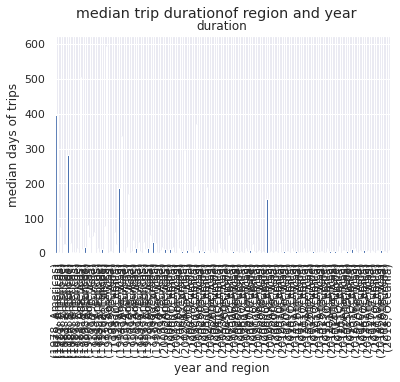

In [87]:
people_mg.plot(stacked=True, kind='bar', subplots=True, ylabel='median days of trips', title='median trip durationof region and year', xlabel='year and region')

filter issue, it included all of the years 

In [88]:
people_mgr = people_mg.reset_index()

In [89]:
people_mgr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date_start  138 non-null    int64  
 1   region      138 non-null    object 
 2   duration    138 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.4+ KB


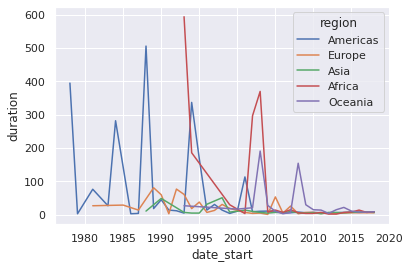

In [90]:
sns.lineplot(data=people_mgr, x='date_start', y='duration',hue='region')